In [1]:
pwd

'/mmfs1/data/bergerar/BC-MRI-ADHD/Code'

In [2]:
import ants
import numpy as np
import os

In [3]:
indir = '../../data/ADHD200/Outputs/fmriprep/fmriprep/' # data directory

In [4]:
# Find subfolders
contents = os.listdir(indir) # contents of the directory
# Contentd folder has subject folders and other files that we don't want 
subs = [content for content in contents if all((content.startswith('sub-') , os.path.isdir(os.path.join(indir,content))))]
# ^ filter the contents to only include folders that start with 'sub-'
subs.sort() # Sort them
subs[0:10] # Print first 10 to see if they look ok

['sub-0010001',
 'sub-0010002',
 'sub-0010003',
 'sub-0010004',
 'sub-0010005',
 'sub-0010006',
 'sub-0010007',
 'sub-0010008',
 'sub-0010009',
 'sub-0010010']

In [6]:
s = 10 # which subject

T1_fn_template = '{sub}_desc-preproc_T1w.nii.gz' #formatted string
brain_mask_template = '{sub}_desc-brain_mask.nii.gz' #formatted string

T1_fn = T1_fn_template.format(sub=subs[s]) # full path to the brain scan
brain_mask_fn = brain_mask_template.format(sub=subs[s])


T1_path = os.path.join(indir,subs[s],'anat',T1_fn)
brain_mask_path = os.path.join(indir,subs[s],'anat',brain_mask_fn)

In [7]:
print(T1_path)
print(brain_mask_path)

../../data/ADHD200/Outputs/fmriprep/fmriprep/sub-0010011/anat/sub-0010011_desc-preproc_T1w.nii.gz
../../data/ADHD200/Outputs/fmriprep/fmriprep/sub-0010011/anat/sub-0010011_desc-brain_mask.nii.gz


In [8]:
T1 = ants.image_read(T1_path) # Read in the image as ants object
brain_mask = ants.image_read(brain_mask_path)

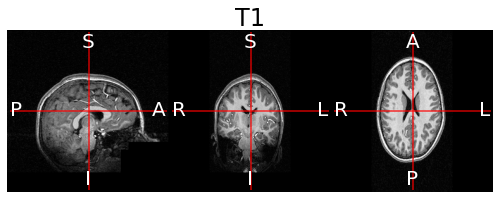

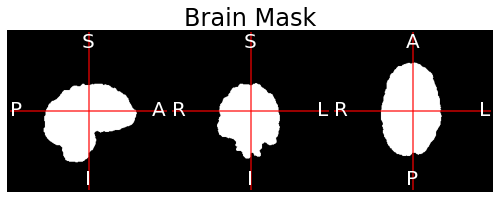

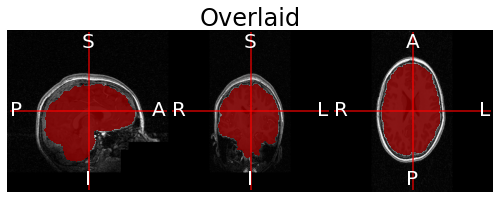

In [9]:
# Do some plotting
T1.plot_ortho(flat=True,title='T1')
brain_mask.plot_ortho(flat=True,title='Brain Mask')
T1.plot_ortho(brain_mask,flat=True,title='Overlaid')

In [10]:
brain = T1.copy() # Make a copy of the brain scan
brain[brain_mask<1]=0 # Zero out non-brain stuff

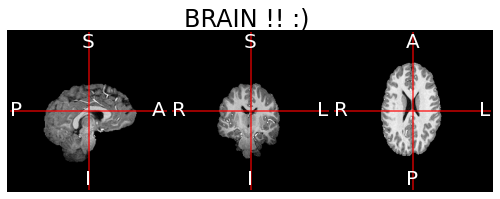

In [11]:
brain.plot_ortho(flat=True,title='BRAIN !! :) ')

In [12]:
print(brain.numpy().shape) # Size of the brain in ~boxels~ voxels

(128, 256, 256)


In [13]:
brain_resampled = brain.resample_image(resample_params=(64,64,64), use_voxels=True, interp_type=4)
# Resample the brain into a 64 x 64 x 64 size

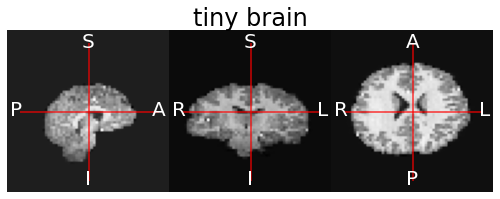

In [14]:
brain_resampled.plot_ortho(flat=True,title='tiny brain')

In [15]:
brain_arr = brain_resampled.numpy() # Brain in a matrix form
brain_arr.shape
out_filename = f'{subs[s]}_brain_64iso'

np.save('../Data/Brain_Matrices/'+out_filename,brain_arr)